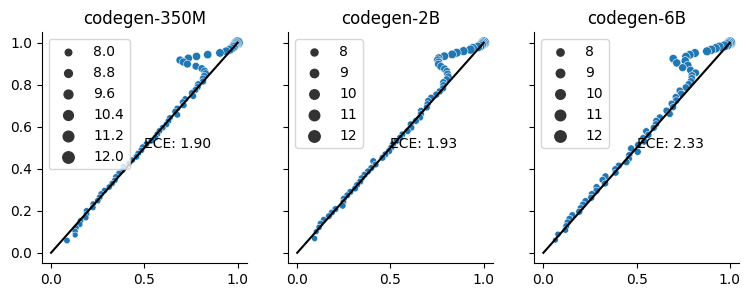

In [3]:
from calibration_metric.vis.calibration_plot import get_df_from_file, plot_df
from matplotlib import pyplot as plt

path = "/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-350M_calflow/outputs/test_all.logits"

fig, ax = plt.subplots(1,3, figsize=(9,3), sharex=True, sharey=True)

paths_and_models = [("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-350M_calflow/outputs/test_all.logits",
                    "codegen-350M"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-2B_calflow/outputs/test_all.logits",
                    "codegen-2B"),
                    ("/brtx/604-nvme2/estengel/calflow_calibration/benchclamp/codegen-6B_calflow/outputs/test_all.logits",
                    "codegen-6B")]
                    
for i, (path, model) in enumerate(paths_and_models):
        df, ece = get_df_from_file(path, n_bins=10, binning_strategy="adaptive") 
        plot_df(df, 
                ax=ax[i],
                title=model, 
                metric_value=ece, 
                xlabel=None,
                ylabel=None) 
